# Employee Attrition Prediction

In [1]:
# Loading libraries needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
random_seed = 316

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/shopee-workshop-building-ann/HR-Employee-Attrition_test.csv
/kaggle/input/shopee-workshop-building-ann/HR-Employee-Attrition_train.csv


# Exploratory Data Analysis

In [2]:
train_df = pd.read_csv('../input/shopee-workshop-building-ann/HR-Employee-Attrition_train.csv')
test_df = pd.read_csv('../input/shopee-workshop-building-ann/HR-Employee-Attrition_test.csv')
print('Train data:', train_df.shape)
print('Test data:', test_df.shape)

Train data: (1370, 35)
Test data: (100, 34)


In [3]:
train_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1370 non-null   int64 
 1   Attrition                 1370 non-null   object
 2   BusinessTravel            1370 non-null   object
 3   DailyRate                 1370 non-null   int64 
 4   Department                1370 non-null   object
 5   DistanceFromHome          1370 non-null   int64 
 6   Education                 1370 non-null   int64 
 7   EducationField            1370 non-null   object
 8   EmployeeCount             1370 non-null   int64 
 9   EmployeeNumber            1370 non-null   int64 
 10  EnvironmentSatisfaction   1370 non-null   int64 
 11  Gender                    1370 non-null   object
 12  HourlyRate                1370 non-null   int64 
 13  JobInvolvement            1370 non-null   int64 
 14  JobLevel                

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       100 non-null    int64 
 1   BusinessTravel            100 non-null    object
 2   DailyRate                 100 non-null    int64 
 3   Department                100 non-null    object
 4   DistanceFromHome          100 non-null    int64 
 5   Education                 100 non-null    int64 
 6   EducationField            100 non-null    object
 7   EmployeeCount             100 non-null    int64 
 8   EmployeeNumber            100 non-null    int64 
 9   EnvironmentSatisfaction   100 non-null    int64 
 10  Gender                    100 non-null    object
 11  HourlyRate                100 non-null    int64 
 12  JobInvolvement            100 non-null    int64 
 13  JobLevel                  100 non-null    int64 
 14  JobRole                   1

In [6]:
train_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.0,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,...,1370.000000,1370.0,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,36.927737,803.920438,9.260584,2.918978,1.0,1022.665693,2.728467,65.845255,2.723358,2.067153,...,2.702190,80.0,0.793431,11.280292,2.805109,2.765693,6.986861,4.218248,2.182482,4.130657
std,9.163392,402.834234,8.135717,1.022753,0.0,602.960439,1.097507,20.308706,0.719220,1.110354,...,1.080572,0.0,0.845450,7.788023,1.300942,0.700510,6.135181,3.609878,3.224312,3.591201
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,484.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,806.500000,7.000000,3.000000,1.0,1016.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1156.000000,14.000000,4.000000,1.0,1554.750000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Class distribution**

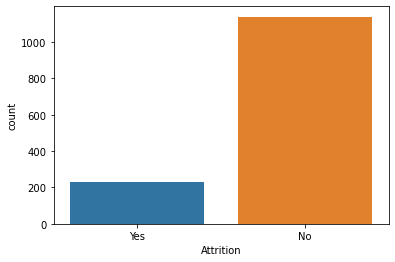

In [7]:
sns.countplot(train_df['Attrition'])
plt.show()

The problem we are trying to solve in this analysis is employee attrition prediction. Based on the features available, we are going to predict whether an employee leaves the company or not.

In [8]:
train_df['Attrition'].value_counts(normalize = True)

No     0.832117
Yes    0.167883
Name: Attrition, dtype: float64

Around 17 percent of the employees in the dataset leaves the company. 

Therefore, the **baseline accuracy** is **83 percent** and our neural network model should definitely beat this baseline benchmark.

# Data Preprocessing

**Check columns for missing and unique values**

In [9]:
col_summary = pd.DataFrame(train_df.columns, columns = ['Column'])
na_list = []
unique_list = []
dtype_list = []

for col in train_df.columns:
    na_list.append(train_df[col].isna().sum())
    unique_list.append(train_df[col].nunique())
    dtype_list.append(train_df[col].dtype)
    
col_summary['Missing values'] = na_list
col_summary['Unique values'] = unique_list
col_summary['Data type'] = dtype_list
col_summary

,Column,Missing values,Unique values,Data type
0,Age,0,43,int64
1,Attrition,0,2,object
2,BusinessTravel,0,3,object
3,DailyRate,0,845,int64
4,Department,0,3,object
5,DistanceFromHome,0,29,int64
6,Education,0,5,int64
7,EducationField,0,6,object
8,EmployeeCount,0,1,int64
9,EmployeeNumber,0,1370,int64


Since columns **'StandardHours', 'Over18', 'EmployeeCount'** has only one unique value, we could exclude them from our features.

In [10]:
train_df.drop(['StandardHours', 'Over18', 'EmployeeCount'], axis = 1, inplace = True)
test_df.drop(['StandardHours', 'Over18', 'EmployeeCount'], axis = 1, inplace = True)

# Extract features

**Check numerical columns**

In [11]:
num_cols = train_df._get_numeric_data()
num_cols

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,36,884,23,2,2061,3,41,4,2,4,...,3,3,1,17,3,3,5,2,0,3
1366,39,613,6,1,2062,4,42,2,3,1,...,3,1,1,9,5,3,7,7,1,7
1367,27,155,4,3,2064,2,87,4,2,2,...,4,2,1,6,0,3,6,2,0,3
1368,49,1023,2,3,2065,4,63,2,2,2,...,3,4,0,17,3,2,9,6,0,8


**Check categorical columns**

In [12]:
cat_cols = train_df[[col for col in train_df.columns if col not in num_cols.columns]]
cat_cols

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1365,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1366,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1367,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1368,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


**Identify id and target columns**

In [13]:
id_col = 'EmployeeNumber'
target_col = 'Attrition'

Encode target column

In [14]:
target_col_mapper = {
    'Yes': 1,
    'No': 0
}

train_df['Attrition'] = train_df['Attrition'].map(target_col_mapper)

**Additional features**

In [15]:
# add 'no_company_before' column
train_df['no_company_before'] = train_df['NumCompaniesWorked'].apply(lambda x: 'Yes' if x == 0 else 'No')
test_df['no_company_before'] = test_df['NumCompaniesWorked'].apply(lambda x: 'Yes' if x == 0 else 'No')

# add 'worked_less_than_a_year' column
train_df['worked_less_than_a_year'] = train_df['TotalWorkingYears'].apply(lambda x: 'Yes' if x == 0 else 'No')
test_df['worked_less_than_a_year'] = test_df['TotalWorkingYears'].apply(lambda x: 'Yes' if x == 0 else 'No')

# add 'no_training_last_year' column
train_df['no_training_last_year'] = train_df['TrainingTimesLastYear'].apply(lambda x: 'Yes' if x == 0 else 'No')
test_df['no_training_last_year'] = test_df['TrainingTimesLastYear'].apply(lambda x: 'Yes' if x == 0 else 'No')

# add 'less_than_a_year_at_company' column
train_df['less_than_a_year_at_company'] = train_df['YearsAtCompany'].apply(lambda x: 'Yes' if x == 0 else 'No')
test_df['less_than_a_year_at_company'] = test_df['YearsAtCompany'].apply(lambda x: 'Yes' if x == 0 else 'No')

# add 'never_promoted' column
train_df['never_promoted'] = train_df['YearsSinceLastPromotion'].apply(lambda x: 'Yes' if x == 0 else 'No')
test_df['never_promoted'] = test_df['YearsSinceLastPromotion'].apply(lambda x: 'Yes' if x == 0 else 'No')

# add 'less_than_a_year_with_manager' column
train_df['less_than_a_year_with_manager'] = train_df['YearsWithCurrManager'].apply(lambda x: 'Yes' if x == 0 else 'No')
test_df['less_than_a_year_with_manager'] = test_df['YearsWithCurrManager'].apply(lambda x: 'Yes' if x == 0 else 'No')

# add 'no_business_travel' column
train_df['no_business_travel'] = train_df['BusinessTravel'].apply(lambda x: 'Yes' if x == 'Non-Travel' else 'No')
test_df['no_business_travel'] = test_df['BusinessTravel'].apply(lambda x: 'Yes' if x == 'Non-Travel' else 'No')

print(train_df.shape, test_df.shape)

(1370, 39) (100, 38)


**Identify nominal and ordinal variables**

In [16]:
# nominal data
nom_cols = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# ordinal data
ord_cols = ['BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

# additional features
nom_cols.append('no_company_before')
nom_cols.append('worked_less_than_a_year')
nom_cols.append('no_training_last_year')
nom_cols.append('less_than_a_year_at_company')
nom_cols.append('never_promoted')
nom_cols.append('less_than_a_year_with_manager')
nom_cols.append('no_business_travel')

**Handle nominal and ordinal variables**

One Hot Encoding: Nominal features

In [17]:
# encode nominal features
def cat_to_dummy(train, test):
    train_d = pd.get_dummies(train)
    test_d = pd.get_dummies(test)
    return train_d, test_d

train_nom, test_nom = cat_to_dummy(train_df[nom_cols], test_df[nom_cols])

# drop original nominal columns
train_df.drop(nom_cols, axis = 1, inplace = True)
test_df.drop(nom_cols, axis = 1, inplace = True)

# concatenate encoded nominal columns
train_df = pd.concat([train_df, train_nom], axis = 1)
test_df = pd.concat([test_df, test_nom], axis = 1)

train_nom

,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,...,no_training_last_year_No,no_training_last_year_Yes,less_than_a_year_at_company_No,less_than_a_year_at_company_Yes,never_promoted_No,never_promoted_Yes,less_than_a_year_with_manager_No,less_than_a_year_with_manager_Yes,no_business_travel_No,no_business_travel_Yes
0,0,0,1,0,1,0,0,0,0,1,...,0,1,1,0,0,1,1,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,1,1,0
3,0,1,0,0,1,0,0,0,0,1,...,1,0,1,0,1,0,0,1,1,0
4,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,1,0
1366,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1367,0,1,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
1368,0,0,1,0,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,1,0


Ordinal Encoding: Ordinal features

In [18]:
train_df['BusinessTravel'].value_counts()

Travel_Rarely        971
Travel_Frequently    261
Non-Travel           138
Name: BusinessTravel, dtype: int64

In [19]:
business_travel_mapper = {
    'Travel_Rarely': 1,
    'Travel_Frequently': 2,
    'Non-Travel': 0
}

train_df['BusinessTravel'] = train_df['BusinessTravel'].map(business_travel_mapper)
test_df['BusinessTravel'] = test_df['BusinessTravel'].map(business_travel_mapper)

The rest of the ordinal features are already in ordinal form so no need to map them.

**Split data into train and test**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop([target_col, id_col], axis=1), train_df[target_col], test_size=0.2, random_state=random_seed, stratify=train_df[target_col])
print('Train data:', X_train.shape)
print('Test data:', X_test.shape)

Train data: (1096, 63)
Test data: (274, 63)


# Feature Scaling

In [21]:
scaler = StandardScaler()
# numerical_cols = [ncol for ncol in train_df.columns if ncol not in nom_cols + ord_cols + [target_col, id_col]]
numerical_cols = [ncol for ncol in train_df.columns if ncol not in nom_cols + [target_col, id_col]]

# fit only on training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

X_train.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,no_training_last_year_No,no_training_last_year_Yes,less_than_a_year_at_company_No,less_than_a_year_at_company_Yes,never_promoted_No,never_promoted_Yes,less_than_a_year_with_manager_No,less_than_a_year_with_manager_Yes,no_business_travel_No,no_business_travel_Yes
1361,-0.861167,-0.166426,-0.814741,2.366980,1.076888,1.157095,0.352696,-1.021229,-0.955022,-1.557182,...,0.19962,-0.19962,0.173422,-0.173422,-1.228010,1.228010,0.47101,-0.47101,0.330623,-0.330623
65,2.383010,1.733605,1.059678,-0.991140,-1.844571,-1.601808,-0.424982,-1.021229,-0.058103,0.253610,...,0.19962,-0.19962,0.173422,-0.173422,0.814325,-0.814325,0.47101,-0.47101,0.330623,-0.330623
363,-1.618142,-0.166426,-1.347106,0.252608,0.103068,-1.601808,-1.105450,0.379606,-0.955022,-0.651786,...,0.19962,-0.19962,0.173422,-0.173422,0.814325,-0.814325,0.47101,-0.47101,0.330623,-0.330623
1329,-0.212332,-0.166426,1.480618,0.003858,1.076888,-0.682174,-0.862426,0.379606,-0.058103,0.253610,...,0.19962,-0.19962,0.173422,-0.173422,-1.228010,1.228010,0.47101,-0.47101,0.330623,-0.330623
1122,1.950453,-0.166426,1.594519,1.620731,0.103068,-1.601808,1.373397,-1.021229,-0.955022,-0.651786,...,0.19962,-0.19962,0.173422,-0.173422,0.814325,-0.814325,0.47101,-0.47101,0.330623,-0.330623


**Save to file: train and test features**

In [22]:
train_df.to_csv('train_scaled.csv', index = False)
test_df.to_csv('test_scaled.csv', index = False)

# Modeling

**Find optimal parameter setting with GridSearch**

In [23]:
%%time
start_time = time.time()

NN = MLPClassifier(max_iter=1000, random_state=random_seed)
parameter_space = {
    'hidden_layer_sizes': [(64, 64, 64), (63, 44, 63), (63, 63, 63), (50,50,50)], # based on the number of features + 1
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(NN, parameter_space, n_jobs=-1, cv=10)
clf.fit(X_train, y_train)
print('Time taken for training the model:', "{:.2f}".format((time.time() - start_time) / 60))

Time taken for training the model: 10.85
CPU times: user 34.8 s, sys: 639 ms, total: 35.4 s
Wall time: 10min 51s


In [24]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (63, 44, 63), 'learning_rate': 'constant', 'solver': 'adam'}


# Evaluation metrics

Choosing the evaluation metrics is quite challenging when dealing with imbalanced datasets. Accuracy is not the right metric as the accuracy of baseline model that classifies everything as overrepresented class is 83%.

In [25]:
def metrics(true, pred):
    recall = recall_score(true, pred)
    f1score = f1_score(true, pred)
    precision = precision_score(true, pred)
    accuracy = accuracy_score(true, pred)
    print(f'recall: {recall}, f1-score: {f1score}, precision: {precision}, accuracy: {accuracy}')

**Performance of the model on training data**

In [26]:
y_true, y_pred = y_train, clf.predict(X_train)
print('Results on train set:')
print(confusion_matrix(y_true, y_pred))
metrics(y_true, y_pred)

Results on train set:
[[912   0]
 [ 26 158]]
recall: 0.8586956521739131, f1-score: 0.9239766081871346, precision: 1.0, accuracy: 0.9762773722627737


**Performance of the model on test data**

In [27]:
y_true, y_pred = y_test, clf.predict(X_test)
print('Results on test set:')
print(confusion_matrix(y_true, y_pred))
metrics(y_true, y_pred)

# current baseline
# accuracy: 0.9014598540145985, recall: 0.6304347826086957, precision: 0.7435897435897436, f1-score: 0.6823529411764706

Results on test set:
[[218  10]
 [ 17  29]]
recall: 0.6304347826086957, f1-score: 0.6823529411764706, precision: 0.7435897435897436, accuracy: 0.9014598540145985


From the confusion matrix, we can see that our neural network misclassified 10 'No's and 17 'Yes's

(TN = 218, FN = 17, FP = 10, TP = 29)

In [28]:
pred = clf.predict(test_df.drop([id_col], axis=1))

In [29]:
submission = pd.DataFrame({
    'EmployeeNumber': test_df[id_col],
    'Attrition': ['Yes' if i == 1 else 'No' for i in pred]
})
submission['Attrition'].value_counts()

No     92
Yes     8
Name: Attrition, dtype: int64

In [30]:
submission.to_csv('submission.csv', index = False)

# References
* [Shopee Workshop Building ANN - Sample code](https://www.kaggle.com/xingyuren/sample-code)
* [Cross-Validation for Imbalanced Datasets - Lumiata Tech Blog](https://medium.com/lumiata/cross-validation-for-imbalanced-datasets-9d203ba47e8)